## Importing Libraries

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import regex as re
import emoji
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import seaborn as sns
import csv
from chardet import detect
from spellchecker import SpellChecker
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\casti\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\casti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Reading Dataset

In [46]:
dataset = pd.read_csv('Datasets/PostElection.csv')

## Understanding the Data

In [47]:
dataset.head()

,Tweet,Username,Date
0,Online info on government websites going down?...,Jauain,5/16/2022
1,"NEWS REPORT: Tonight, at exactly 11:19 PM, Vic...",PhilippinePDNS,5/16/2022
2,JUST IN: Former COMELEC Chairman Andy Bautista...,PhilippinePDNS,5/16/2022
3,"Lahat ng COC sa #Halalan2022 maliban sa isa, n...",updatesmanila,5/16/2022
4,BREAKING NEWS: COMELEC will proclaim the winni...,GreenGiantFM,5/16/2022


In [48]:
dataset.shape

(6641, 3)

In [49]:
dataset.dtypes

Tweet       object
Username    object
Date        object
dtype: object

In [50]:
dataset.describe()

,Tweet,Username,Date
count,6641,6641,6641
unique,5865,2484,21
top,#Halalan2022,news5ph,5/11/2022
freq,19,371,2222


In [51]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6641 entries, 0 to 6640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweet     6641 non-null   object
 1   Username  6641 non-null   object
 2   Date      6641 non-null   object
dtypes: object(3)
memory usage: 155.8+ KB


In [52]:
dataset.isna().sum()

Tweet       0
Username    0
Date        0
dtype: int64

## Data Cleaning

In [53]:
#Raw Dataset
dataset

,Tweet,Username,Date
0,Online info on government websites going down?...,Jauain,5/16/2022
1,"NEWS REPORT: Tonight, at exactly 11:19 PM, Vic...",PhilippinePDNS,5/16/2022
2,JUST IN: Former COMELEC Chairman Andy Bautista...,PhilippinePDNS,5/16/2022
3,"Lahat ng COC sa #Halalan2022 maliban sa isa, n...",updatesmanila,5/16/2022
4,BREAKING NEWS: COMELEC will proclaim the winni...,GreenGiantFM,5/16/2022
...,...,...,...
6636,Dictator Ferdinand Marcos from the Philippines...,tayomuna,5/28/2022
6637,This election rewrites history. People voted f...,kollenedoncillo,5/28/2022
6638,"Hey, it’s a free country. No one has monopoly ...",joel_gregorio,5/28/2022
6639,HALA-lan. \n\n#Election2022PH,keithjumaani,5/29/2022


In [54]:
#1 Drop unnecessary columns

dataset.drop(['Date','Username'], axis=1, inplace=True)
dataset

,Tweet
0,Online info on government websites going down?...
1,"NEWS REPORT: Tonight, at exactly 11:19 PM, Vic..."
2,JUST IN: Former COMELEC Chairman Andy Bautista...
3,"Lahat ng COC sa #Halalan2022 maliban sa isa, n..."
4,BREAKING NEWS: COMELEC will proclaim the winni...
...,...
6636,Dictator Ferdinand Marcos from the Philippines...
6637,This election rewrites history. People voted f...
6638,"Hey, it’s a free country. No one has monopoly ..."
6639,HALA-lan. \n\n#Election2022PH


In [55]:
#Get the exact duplicate tweets in the dataframe
print("Duplicate Tweets:", len(dataset['Tweet'])-len(dataset['Tweet'].drop_duplicates()))

Duplicate Tweets: 776


In [56]:
dups = dataset["Tweet"]
dups_listed = dataset[dups.isin(dups[dups.duplicated()])].sort_values("Tweet")
print(dups_listed)

                                                  Tweet
1059  "A department of the Commission on Elections (...
4906  "A department of the Commission on Elections (...
4597  "A tally of 172 out of 173 certificates of can...
750   "A tally of 172 out of 173 certificates of can...
152   "Around 8 in 10 registered voters cast their b...
...                                                 ...
164   📍 FINAL REPORT 📍\n\n#VoteReportPH #VRPH2022 #B...
469   🔊🔊🔊 Join the discussion tomorrow, May 18, at 7...
4400  🔊🔊🔊 Join the discussion tomorrow, May 18, at 7...
1307  🤠Alrite let's discuss the Top 10-14 candidates...
5019  🤠Alrite let's discuss the Top 10-14 candidates...

[1462 rows x 1 columns]


In [57]:
# 2 Remove Exact Duplicate Tweets
# Drop the last duplicate and keep the first one
# Reset column index

dataset.drop_duplicates(subset='Tweet', keep="first", inplace=True)
dataset = dataset.reset_index()

In [58]:
# Drop old index column
dataset.drop(['index'], axis=1, inplace=True)
dataset

,Tweet
0,Online info on government websites going down?...
1,"NEWS REPORT: Tonight, at exactly 11:19 PM, Vic..."
2,JUST IN: Former COMELEC Chairman Andy Bautista...
3,"Lahat ng COC sa #Halalan2022 maliban sa isa, n..."
4,BREAKING NEWS: COMELEC will proclaim the winni...
...,...
5860,Dictator Ferdinand Marcos from the Philippines...
5861,This election rewrites history. People voted f...
5862,"Hey, it’s a free country. No one has monopoly ..."
5863,HALA-lan. \n\n#Election2022PH


In [59]:
# Get the percentage of emojis in the dataset
def calculate_percentage_of_emojis(text):
    emoji_pattern = re.compile(r'\p{Emoji}')
    
    emojis = emoji_pattern.findall(text)
    
    # Calculate the percentage of Unicode emojis
    total_chars = len(text)
    if total_chars > 0:
        percentage = (len(emojis) / total_chars) * 100
    else:
        percentage = 0
    return percentage

overall_percentage_of_emojis = dataset['Tweet'].apply(calculate_percentage_of_emojis).mean()

print(f"Overall Percentage of Emojis in the Dataset: {overall_percentage_of_emojis:.2f}%")

Overall Percentage of Emojis in the Dataset: 6.75%


In [60]:
# 3 Transform Emojis to Text
def transform_emojis(text):
    text = emoji.demojize(text, delimiters=(" ", " "))
    return text

dataset['Tweet'] = dataset['Tweet'].apply(transform_emojis)
dataset

,Tweet
0,Online info on government websites going down?...
1,"NEWS REPORT: Tonight, at exactly 11:19 PM, Vic..."
2,JUST IN: Former COMELEC Chairman Andy Bautista...
3,"Lahat ng COC sa #Halalan2022 maliban sa isa, n..."
4,BREAKING NEWS: COMELEC will proclaim the winni...
...,...
5860,Dictator Ferdinand Marcos from the Philippines...
5861,This election rewrites history. People voted f...
5862,"Hey, it’s a free country. No one has monopoly ..."
5863,HALA-lan. \n\n#Election2022PH


In [61]:
# 4 Replace "#" with the word "hashtag" in the "Tweets" column
dataset['Tweet'] = dataset['Tweet'].str.replace("#", "hashtag")
dataset

,Tweet
0,Online info on government websites going down?...
1,"NEWS REPORT: Tonight, at exactly 11:19 PM, Vic..."
2,JUST IN: Former COMELEC Chairman Andy Bautista...
3,Lahat ng COC sa hashtagHalalan2022 maliban sa ...
4,BREAKING NEWS: COMELEC will proclaim the winni...
...,...
5860,Dictator Ferdinand Marcos from the Philippines...
5861,This election rewrites history. People voted f...
5862,"Hey, it’s a free country. No one has monopoly ..."
5863,HALA-lan. \n\nhashtagElection2022PH


In [62]:
# 5 Remove non-alphanumeric characters, spaces & links
def clean_text(text):
    text = text.replace('?', ' ').replace('!', ' ') # Remove question marks, exclamation points
    text = ' '.join([word for word in text.split() if not word.startswith('@')]) # Remove mention tags
    text = text.replace('\n', ' ') # Remove newline characters

    # Remove all non-alphanumeric characters except hashtags, underscores, and spaces
    text = re.sub(r'[^a-zA-Z0-9_#\s]', '', text)

    # Remove words containing "http" and "https" and other links
    text = ' '.join([word for word in text.split() if not re.search(r'https', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'http', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'youtube', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'vanBF1_BCyyo', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'story_fbid', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'listOLAK5uy', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'edition_id', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'News5GVGregorio', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'utm_', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'fbclidIwAR', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'p23', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'p24', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'p25', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'category_', word)])
    text = ' '.join([word for word in text.split() if not re.search(r'v_DUc7', word)])
    
    text = text.replace('...', ' ') # Remove ellipses
    text = ' '.join(text.split()) # Replace multiple spaces with a single space
    text = text.strip() # Remove leading/trailing spaces
    return text

dataset['Tweet'] = dataset['Tweet'].apply(clean_text)
print(dataset)

                                                  Tweet
0     Online info on government websites going down ...
1     NEWS REPORT Tonight at exactly 1119 PM Vice Pr...
2     JUST IN Former COMELEC Chairman Andy Bautista ...
3     Lahat ng COC sa hashtagHalalan2022 maliban sa ...
4     BREAKING NEWS COMELEC will proclaim the winnin...
...                                                 ...
5860  Dictator Ferdinand Marcos from the Philippines...
5861  This election rewrites history People voted fo...
5862  Hey its a free country No one has monopoly of ...
5863                      HALAlan hashtagElection2022PH
5864  Cheating malalim na sugat kahit mahilom mahira...

[5865 rows x 1 columns]


In [63]:
# 6 Tokenization

dataset['Tokenized_Tweets'] = dataset['Tweet'].apply(lambda x: word_tokenize(x))

dataset['Tokenized_Tweets']

0       [Online, info, on, government, websites, going...
1       [NEWS, REPORT, Tonight, at, exactly, 1119, PM,...
2       [JUST, IN, Former, COMELEC, Chairman, Andy, Ba...
3       [Lahat, ng, COC, sa, hashtagHalalan2022, malib...
4       [BREAKING, NEWS, COMELEC, will, proclaim, the,...
                              ...                        
5860    [Dictator, Ferdinand, Marcos, from, the, Phili...
5861    [This, election, rewrites, history, People, vo...
5862    [Hey, its, a, free, country, No, one, has, mon...
5863                     [HALAlan, hashtagElection2022PH]
5864    [Cheating, malalim, na, sugat, kahit, mahilom,...
Name: Tokenized_Tweets, Length: 5865, dtype: object

In [64]:
# 7 Case Transformation
# Function to transform tokenized tweets to lowercase
def lowercase_tokens(tokens):
    return [token.lower() for token in tokens]

dataset['Tokenized_Tweets'] = dataset['Tokenized_Tweets'].apply(lambda x: lowercase_tokens(x))
print(dataset['Tokenized_Tweets'])

0       [online, info, on, government, websites, going...
1       [news, report, tonight, at, exactly, 1119, pm,...
2       [just, in, former, comelec, chairman, andy, ba...
3       [lahat, ng, coc, sa, hashtaghalalan2022, malib...
4       [breaking, news, comelec, will, proclaim, the,...
                              ...                        
5860    [dictator, ferdinand, marcos, from, the, phili...
5861    [this, election, rewrites, history, people, vo...
5862    [hey, its, a, free, country, no, one, has, mon...
5863                     [halalan, hashtagelection2022ph]
5864    [cheating, malalim, na, sugat, kahit, mahilom,...
Name: Tokenized_Tweets, Length: 5865, dtype: object


In [65]:
# Function to extract the words with underscores
def extract_words_with_underscores(row):
    words = row
    emoji_words = [word for word in words if '_' in word]
    return ', '.join(emoji_words)

dataset['Emoji'] = dataset['Tokenized_Tweets'].apply(extract_words_with_underscores)
print(dataset)

                                                  Tweet  \
0     Online info on government websites going down ...   
1     NEWS REPORT Tonight at exactly 1119 PM Vice Pr...   
2     JUST IN Former COMELEC Chairman Andy Bautista ...   
3     Lahat ng COC sa hashtagHalalan2022 maliban sa ...   
4     BREAKING NEWS COMELEC will proclaim the winnin...   
...                                                 ...   
5860  Dictator Ferdinand Marcos from the Philippines...   
5861  This election rewrites history People voted fo...   
5862  Hey its a free country No one has monopoly of ...   
5863                      HALAlan hashtagElection2022PH   
5864  Cheating malalim na sugat kahit mahilom mahira...   

                                       Tokenized_Tweets Emoji  
0     [online, info, on, government, websites, going...        
1     [news, report, tonight, at, exactly, 1119, pm,...        
2     [just, in, former, comelec, chairman, andy, ba...        
3     [lahat, ng, coc, sa, hashtagh

In [66]:
# Create Abbreviation Dictionary
abbreviation_dict = {}
abbreviation = pd.read_csv('Abbreviation.csv')
with open('Abbreviation.csv', mode='r') as inp:
  reader = csv.reader(inp)
  headers = next(reader)
  abbreviation_dict = {rows[0]:rows[1] for rows in reader}
abbreviation_dict

{'88m': 'bbm',
 'accling': 'queer',
 'ad': 'advertisement',
 'agri': 'agricultural',
 'amp ': 'ang puta',
 'ampalaya': 'bitter',
 'anniv': 'anniversary',
 'app': 'application',
 'ar': 'augmented reality',
 'atty': 'attorney',
 'ave': 'avenue',
 'b4': 'before',
 'babym': 'bbm',
 'bcoz': 'because',
 'bcs': 'because',
 'bec': 'because',
 'beh': 'best friend',
 'BEI': 'board of election inspector',
 'bes': 'best friend',
 'besh': 'best friend',
 'beshie': 'best friend',
 'beybiem': 'bbm',
 'bgy': 'barangay',
 'bishies': 'best friend',
 'blengbong': 'bongbong',
 'bp': 'bise presidente',
 'brgy': 'barangay',
 'brgys': 'barangays',
 'bs': 'bull shit',
 'bugok': 'stupid',
 'bull': 'ridiculous',
 'c/o': 'credit to the owner',
 'camsur': 'camarines sur',
 'chariz': 'joke',
 'charot': 'joke',
 'charots': 'joke',
 'clav': 'commitee on local absentee voting',
 'cmd': 'christian muslim democrats',
 'coc': 'certificate of candidacy',
 'cocs': 'certificate of candidacy',
 'coe': 'commission on electio

In [67]:
#Adding underscores for abbreviation definitions that have more than one word

abbreviation_dict = {key:value.replace(' ','_')for key, value in abbreviation_dict.items()}
abbreviation_dict

{'88m': 'bbm',
 'accling': 'queer',
 'ad': 'advertisement',
 'agri': 'agricultural',
 'amp ': 'ang_puta',
 'ampalaya': 'bitter',
 'anniv': 'anniversary',
 'app': 'application',
 'ar': 'augmented_reality',
 'atty': 'attorney',
 'ave': 'avenue',
 'b4': 'before',
 'babym': 'bbm',
 'bcoz': 'because',
 'bcs': 'because',
 'bec': 'because',
 'beh': 'best_friend',
 'BEI': 'board_of_election_inspector',
 'bes': 'best_friend',
 'besh': 'best_friend',
 'beshie': 'best_friend',
 'beybiem': 'bbm',
 'bgy': 'barangay',
 'bishies': 'best_friend',
 'blengbong': 'bongbong',
 'bp': 'bise_presidente',
 'brgy': 'barangay',
 'brgys': 'barangays',
 'bs': 'bull_shit',
 'bugok': 'stupid',
 'bull': 'ridiculous',
 'c/o': 'credit_to_the_owner',
 'camsur': 'camarines_sur',
 'chariz': 'joke',
 'charot': 'joke',
 'charots': 'joke',
 'clav': 'commitee_on_local_absentee_voting',
 'cmd': 'christian_muslim_democrats',
 'coc': 'certificate_of_candidacy',
 'cocs': 'certificate_of_candidacy',
 'coe': 'commission_on_electio

In [68]:
# 8 Abbreviation Transformation
def transform_abbreviations_within_tokens(tokens, abbreviation_dict):
    transformed_tokens = []
    
    for token in tokens:
        words = token.split()
        transformed_words = []
        
        for word in words:
            if word in abbreviation_dict:
                transformed_words.append(abbreviation_dict[word])
            else:
                transformed_words.append(word)
        
        transformed_token = ' '.join(transformed_words)
        transformed_tokens.append(transformed_token)
    
    return transformed_tokens

dataset['Tokenized_Tweets'] = dataset['Tokenized_Tweets'].apply(lambda x: transform_abbreviations_within_tokens(x, abbreviation_dict))
print(dataset['Tokenized_Tweets'])

0       [online, info, on, government, websites, going...
1       [news, report, tonight, at, exactly, 1119, pm,...
2       [just, in, former, commission_on_elections, ch...
3       [lahat, ng, certificate_of_candidacy, sa, hash...
4       [breaking, news, commission_on_elections, will...
                              ...                        
5860    [dictator, ferdinand, marcos, from, the, phili...
5861    [this, election, rewrites, history, people, vo...
5862    [hey, its, a, free, country, no, one, has, mon...
5863                     [halalan, hashtagelection2022ph]
5864    [cheating, malalim, na, sugat, kahit, mahilom,...
Name: Tokenized_Tweets, Length: 5865, dtype: object


In [69]:
# 9 Misspelled Words Transformation
spell_checker_en = SpellChecker()

tagalog_word_list = []
with open('tl_PH.aff', 'r', encoding='utf-8') as word_list_file:
    tagalog_word_list = [line.strip() for line in word_list_file]


def detect_language(text):
    try:
        return detect(text)
    except:
        return "unknown" 
def correct_words(tokens):
    language = detect_language(' '.join(tokens))
    
    corrected_tokens = [
        spell_checker_en.correction(word) if language == 'en' else
        word.lower() if language == 'tl' and word.lower() in tagalog_word_list else
        word
        for word in tokens
    ]

    return corrected_tokens

dataset['Corrected_Words'] = dataset['Tokenized_Tweets'].apply(correct_words)
print(dataset['Corrected_Words'])

0       [online, info, on, government, websites, going...
1       [news, report, tonight, at, exactly, 1119, pm,...
2       [just, in, former, commission_on_elections, ch...
3       [lahat, ng, certificate_of_candidacy, sa, hash...
4       [breaking, news, commission_on_elections, will...
                              ...                        
5860    [dictator, ferdinand, marcos, from, the, phili...
5861    [this, election, rewrites, history, people, vo...
5862    [hey, its, a, free, country, no, one, has, mon...
5863                     [halalan, hashtagelection2022ph]
5864    [cheating, malalim, na, sugat, kahit, mahilom,...
Name: Corrected_Words, Length: 5865, dtype: object


In [70]:
# Get the total number of Ordinal Values
import re

def count_ordinals_in_tokens(tokens):
    ordinal_pattern = r'\d+(st|nd|rd|th)'
    ordinals = [match for token in tokens for match in re.findall(ordinal_pattern, token)]
    return len(ordinals)
corrected_tokens = [token for tokens in dataset['Corrected_Words'] for token in tokens]

total_ordinal_count = count_ordinals_in_tokens(corrected_tokens)
print(f"Total Count of Ordinals in 'Corrected_Words' Column: {total_ordinal_count}")

Total Count of Ordinals in 'Corrected_Words' Column: 142


In [71]:
# 10 Ordinal Transformation
def transform_numeric_ordinals(tokens):
    ordinal_pattern = r'(\d+)(st|nd|rd|th)\b'
    def replace_ordinal(match):
        num = match.group(1)
        suffix = match.group(2)
        if suffix == 'st':
            return num + ' first'
        elif suffix == 'nd':
            return num + ' second'
        elif suffix == 'rd':
            return num + ' third'
        else:
            return num + 'th'
    
    transformed_tokens = [re.sub(ordinal_pattern, replace_ordinal, token) if re.match(ordinal_pattern, token) else token for token in tokens]

    return ' '.join(transformed_tokens).split()

dataset['Corrected_Words'] = dataset['Corrected_Words'].apply(transform_numeric_ordinals)
print(dataset['Corrected_Words'])

0       [online, info, on, government, websites, going...
1       [news, report, tonight, at, exactly, 1119, pm,...
2       [just, in, former, commission_on_elections, ch...
3       [lahat, ng, certificate_of_candidacy, sa, hash...
4       [breaking, news, commission_on_elections, will...
                              ...                        
5860    [dictator, ferdinand, marcos, from, the, phili...
5861    [this, election, rewrites, history, people, vo...
5862    [hey, its, a, free, country, no, one, has, mon...
5863                     [halalan, hashtagelection2022ph]
5864    [cheating, malalim, na, sugat, kahit, mahilom,...
Name: Corrected_Words, Length: 5865, dtype: object


In [72]:
# 11 Stopwords Removal
stopwords_df = pd.read_csv('stopwords.csv')
combined_stopwords = set(stopwords_df['Stopword'])

filtered_word_lists = []

for tokens in dataset['Corrected_Words']:
    if isinstance(tokens, list):
        filtered_tokens = [word for word in tokens if word not in combined_stopwords]
        filtered_word_lists.append(filtered_tokens)
    else:
        filtered_word_lists.append([])

dataset['Corrected_Words'] = filtered_word_lists

In [73]:
# 12 Function to remove numbers
def remove_numbers_and_blank_spaces(tokens):
    number_pattern = r'\d+'
    tokens_without_numbers = []
    
    for token in tokens:
        token_without_numbers = re.sub(number_pattern, '', token).strip()
        if token_without_numbers:
            tokens_without_numbers.append(token_without_numbers)
    
    return tokens_without_numbers

In [74]:
# 13 Function to remove hashtags used
def remove_hashtags(tokens):
    hashtags_to_remove = ['hashtaghalalan', 'hashtagbilangpilipino', 'hashtagelectionph','hashtageleksyon']
    return [token for token in tokens if token not in hashtags_to_remove]

In [75]:
# 14 Function for lemmatization
def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in tokens]

def preprocess_text(text):
    # Apply lemmatization
    lemmatized_tokens = lemmatize_tokens(text)
    
    # Remove numbers and hashtags
    tokens_without_numbers = remove_numbers_and_blank_spaces(lemmatized_tokens)
    tokens_without_hashtags = remove_hashtags(tokens_without_numbers)
    
    cleaned_text = ', '.join(tokens_without_hashtags)
    
    return cleaned_text

dataset['Corrected_Words'] = dataset['Corrected_Words'].apply(preprocess_text)
print(dataset['Corrected_Words'])

0       online, info, government, website, archive, ha...
1       news, report, tonight, vice, president, leni, ...
2       commission_on_elections, chairman, andy, bauti...
3       certificate_of_candidacy, maliban, nabilang, c...
4       breaking, news, commission_on_elections, procl...
                              ...                        
5860    dictator, ferdinand, marcos, philippine, featu...
5861    election, rewrite, history, people, voted, per...
5862    hey, free, country, monopoly, knowledge, elect...
5863                                              halalan
5864    cheating, malalim, sugat, mahilom, mahirap, ka...
Name: Corrected_Words, Length: 5865, dtype: object


In [76]:
# Rearrange columns
dataset = dataset[['Tweet', 'Tokenized_Tweets', 'Corrected_Words', 'Emoji']]
print(dataset)

                                                  Tweet  \
0     Online info on government websites going down ...   
1     NEWS REPORT Tonight at exactly 1119 PM Vice Pr...   
2     JUST IN Former COMELEC Chairman Andy Bautista ...   
3     Lahat ng COC sa hashtagHalalan2022 maliban sa ...   
4     BREAKING NEWS COMELEC will proclaim the winnin...   
...                                                 ...   
5860  Dictator Ferdinand Marcos from the Philippines...   
5861  This election rewrites history People voted fo...   
5862  Hey its a free country No one has monopoly of ...   
5863                      HALAlan hashtagElection2022PH   
5864  Cheating malalim na sugat kahit mahilom mahira...   

                                       Tokenized_Tweets  \
0     [online, info, on, government, websites, going...   
1     [news, report, tonight, at, exactly, 1119, pm,...   
2     [just, in, former, commission_on_elections, ch...   
3     [lahat, ng, certificate_of_candidacy, sa, hash...

In [77]:
#Remove whitespaces from Corrected Words Column in preparation for Topic Modeling
dataset['Corrected_Words'] = dataset['Corrected_Words'].str.strip()
dataset

,Tweet,Tokenized_Tweets,Corrected_Words,Emoji
0,Online info on government websites going down ...,"[online, info, on, government, websites, going...","online, info, government, website, archive, ha...",
1,NEWS REPORT Tonight at exactly 1119 PM Vice Pr...,"[news, report, tonight, at, exactly, 1119, pm,...","news, report, tonight, vice, president, leni, ...",
2,JUST IN Former COMELEC Chairman Andy Bautista ...,"[just, in, former, commission_on_elections, ch...","commission_on_elections, chairman, andy, bauti...",
3,Lahat ng COC sa hashtagHalalan2022 maliban sa ...,"[lahat, ng, certificate_of_candidacy, sa, hash...","certificate_of_candidacy, maliban, nabilang, c...",
4,BREAKING NEWS COMELEC will proclaim the winnin...,"[breaking, news, commission_on_elections, will...","breaking, news, commission_on_elections, procl...",
...,...,...,...,...
5860,Dictator Ferdinand Marcos from the Philippines...,"[dictator, ferdinand, marcos, from, the, phili...","dictator, ferdinand, marcos, philippine, featu...",
5861,This election rewrites history People voted fo...,"[this, election, rewrites, history, people, vo...","election, rewrite, history, people, voted, per...",
5862,Hey its a free country No one has monopoly of ...,"[hey, its, a, free, country, no, one, has, mon...","hey, free, country, monopoly, knowledge, elect...",
5863,HALAlan hashtagElection2022PH,"[halalan, hashtagelection2022ph]",halalan,


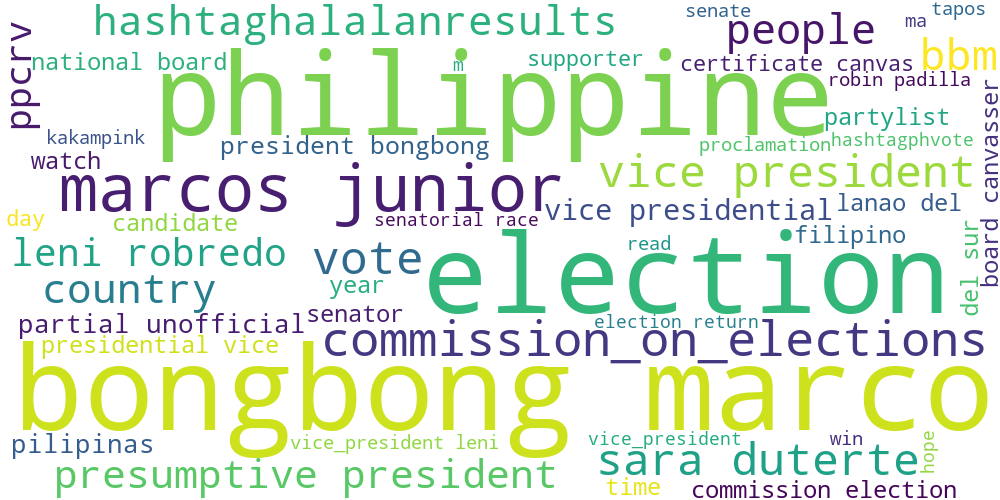

In [78]:
# The use of wordcloud to check if all steps were done correctly
from wordcloud import WordCloud

long_string = ','.join(list(dataset['Corrected_Words'].values))
wordcloud = WordCloud(background_color="white", max_words=50, contour_width=3, contour_color='steelblue',width=1000, height=500)
wordcloud.generate(long_string)
wordcloud.to_image()

## Topic Modeling

In [79]:
import gensim
from gensim import corpora
import numpy as np

documents = dataset['Corrected_Words'].values
tokenized_documents = [doc.split(",") for doc in documents] 

#Create Dictionary
id2word = corpora.Dictionary(tokenized_documents)

#Create Corpus
texts = tokenized_documents

#Term Document Frequency
corpus = [id2word.doc2bow(doc) for doc in tokenized_documents] 

In [80]:
# Build the LDA model
num_topics = 4 
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, passes=15,
                                            random_state=42,chunksize=50,per_word_topics=True)
for topic_id, topic_words in lda_model.print_topics():
    print(f"Topic {topic_id}: {topic_words}")

Topic 0: 0.051*" election" + 0.017*" canvassing" + 0.013*" canvas" + 0.013*" commission_on_elections" + 0.011*" national" + 0.010*" certificate_of_candidacy" + 0.010*" partylist" + 0.009*" representative" + 0.009*" certificate" + 0.008*" board"
Topic 1: 0.020*" philippine" + 0.012*" country" + 0.008*" hashtagphilippines" + 0.008*" people" + 0.008*" rolling_on_the_floor_laughing" + 0.006*" bbm" + 0.006*" hashtagelectionaftermath" + 0.006*" filipino" + 0.006*" hashtagbbmsarauniteam" + 0.005*" hashtagelections"
Topic 2: 0.032*" vote" + 0.011*" congress" + 0.011*" leader" + 0.011*" house" + 0.010*" majority" + 0.009*" senator" + 0.008*" city" + 0.008*" boto" + 0.008*" enraged_face" + 0.007*" poll"
Topic 3: 0.047*" president" + 0.047*" marcos" + 0.031*" bongbong" + 0.023*" vice" + 0.022*" duterte" + 0.020*" sara" + 0.017*" junior" + 0.015*" leni" + 0.013*" presidential" + 0.013*" presumptive"


In [81]:
document_topics = []
for doc_bow in corpus:
    topics = lda_model[doc_bow]
    document_topics.append(topics)

print(f"Topics for Post-Election Tweets: {document_topics[0]}")

Topics for Post-Election Tweets: ([(0, 0.23525904), (1, 0.0416381), (2, 0.6844667), (3, 0.03863614)], [(0, [2, 1]), (1, [2]), (2, [2, 0, 1]), (3, [2, 0]), (4, [0, 2]), (5, [2, 0])], [(0, [(1, 0.015023209), (2, 0.9705598)]), (1, [(2, 0.9999017)]), (2, [(0, 0.15076354), (1, 0.012371965), (2, 0.73592794)]), (3, [(0, 0.02678406), (2, 0.96383893)]), (4, [(0, 0.98386085), (2, 0.01361045)]), (5, [(0, 0.16959871), (2, 0.6807251)])])


### Coherence Score

In [82]:
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

In [83]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=tokenized_documents, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.44280972229839577


### Finding the Optimal Number of Topics

In [84]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=1):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, num_topics=num_topics, passes=15,
                                            random_state=42,chunksize=50,per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=lda_model, texts=tokenized_documents, dictionary=id2word, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [85]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts, start=2, limit=8, step=1)

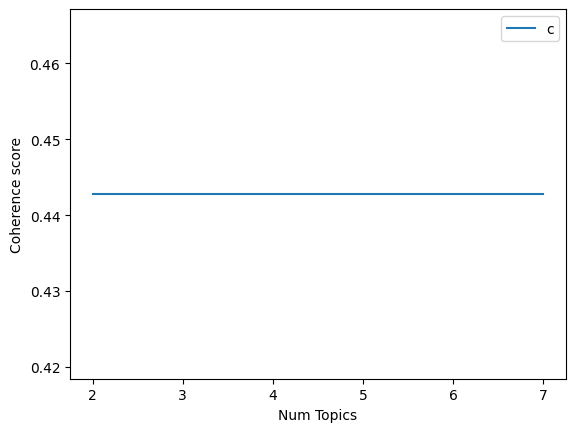

In [86]:
limit=8
start=2
step=1
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"),loc='best')
plt.show()

In [87]:
for m, cv in zip(x, coherence_values):
    print("Number of Topics =", m, "has Coherence Value of", round(cv,4))

Number of Topics = 2 has Coherence Value of 0.4428
Number of Topics = 3 has Coherence Value of 0.4428
Number of Topics = 4 has Coherence Value of 0.4428
Number of Topics = 5 has Coherence Value of 0.4428
Number of Topics = 6 has Coherence Value of 0.4428
Number of Topics = 7 has Coherence Value of 0.4428


### Topic Modeling Visualization

In [88]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
cloud = WordCloud(background_color='white', width=2500, height=2800, max_words=20,
                         colormap='tab10', color_func=lambda * args, **kwargs: cols[i],
                         prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)
topics

[(0,
  [(' election', 0.051406987),
   (' canvassing', 0.01722158),
   (' canvas', 0.013200859),
   (' commission_on_elections', 0.012918701),
   (' national', 0.011214008),
   (' certificate_of_candidacy', 0.010450164),
   (' partylist', 0.009600143),
   (' representative', 0.008805285),
   (' certificate', 0.008632182),
   (' board', 0.0080244215)]),
 (1,
  [(' philippine', 0.020402307),
   (' country', 0.01197579),
   (' hashtagphilippines', 0.008013237),
   (' people', 0.007556546),
   (' rolling_on_the_floor_laughing', 0.007522905),
   (' bbm', 0.00609717),
   (' hashtagelectionaftermath', 0.005832898),
   (' filipino', 0.005603484),
   (' hashtagbbmsarauniteam', 0.0055751596),
   (' hashtagelections', 0.004998309)]),
 (2,
  [(' vote', 0.031717733),
   (' congress', 0.011278032),
   (' leader', 0.011225516),
   (' house', 0.010656669),
   (' majority', 0.0097825695),
   (' senator', 0.009162972),
   (' city', 0.008135511),
   (' boto', 0.008106555),
   (' enraged_face', 0.00807855

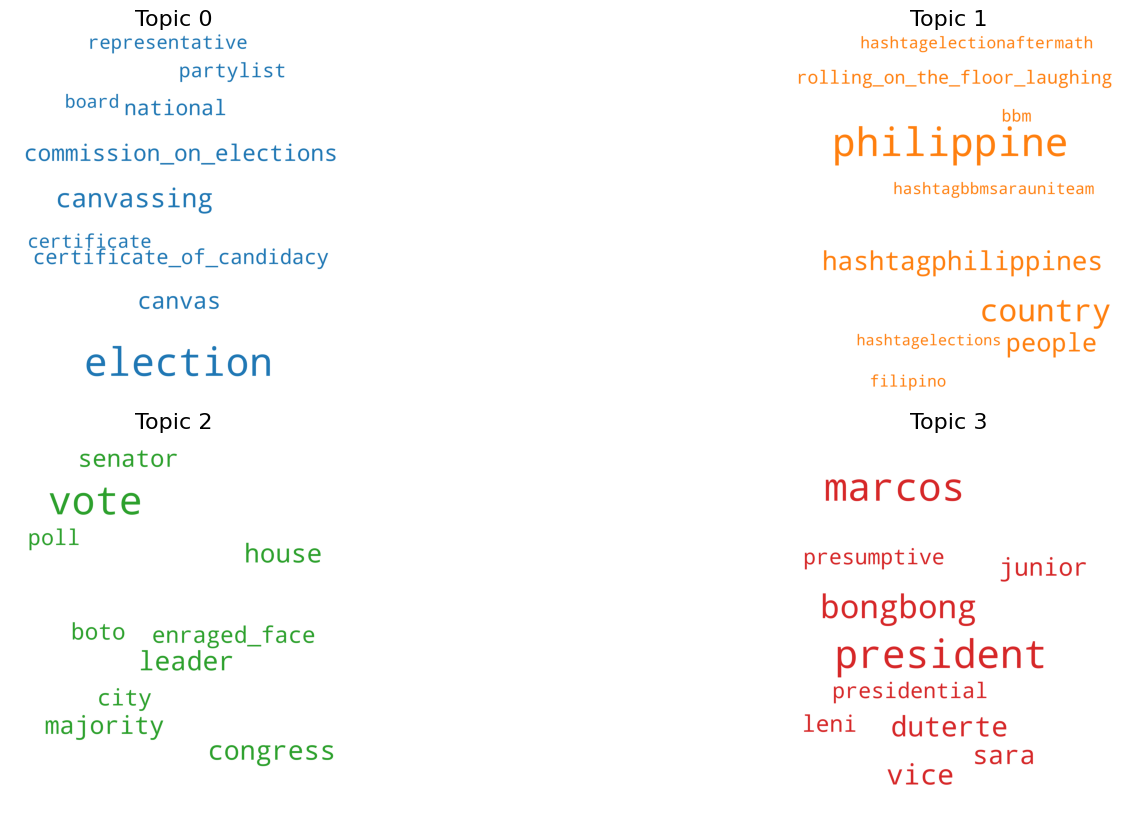

In [89]:
fig, axes = plt.subplots(2,2, figsize=(20,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words,max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic '+ str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0.1)
plt.axis('off')
plt.margins(x=0,y=0)
plt.tight_layout
plt.show()
